<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%202%3A%20Descriptive%20Analytics/2_3_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Descriptive Statistics**


Employee data from IBM SPSS data files were used for this chapter’s
applications, which included the annual salary, starting salary, age, gender, job time,previous experience, and job type of 474 employees.

In [2]:
import  numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Dataset import
url='https://docs.google.com/spreadsheets/d/141eqGzfv-Kedjmgciqo_9yE-Xn_MtQa0/edit?usp=sharing&ouid=108589602591644119588&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_excel(path) 

In [4]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp
0,Male,43,15,Manager,57000,27000,98,144
1,Male,37,16,Clerical,40200,18750,98,36
2,Female,66,12,Clerical,21450,12000,98,381
3,Female,48,8,Clerical,21900,13200,98,190
4,Male,40,15,Clerical,45000,21000,98,138


In [5]:
data.columns

Index(['gender', 'age', 'educ', 'jobcat', 'salary', 'salbegin', 'jobtime',
       'prevexp'],
      dtype='object')

In [6]:
data.isnull().values.any()

False

In [7]:
data.dtypes


gender      object
age          int64
educ         int64
jobcat      object
salary       int64
salbegin     int64
jobtime      int64
prevexp      int64
dtype: object

### Education frequency

In [8]:
t1=data["educ"].value_counts(sort=False)
t2=data["educ"].value_counts(normalize=True,sort=False)
tx= pd.concat([t1, t2], axis = 1)
print(tx)

    educ      educ
15   116  0.244726
16    59  0.124473
12   190  0.400844
8     53  0.111814
19    27  0.056962
17    11  0.023207
18     9  0.018987
14     6  0.012658
20     2  0.004219
21     1  0.002110


### Education frequency by gender

In [9]:
pd.crosstab(data['educ'],data["gender"], margins=True)

gender,Female,Male,All
educ,,,
8,30,23,53
12,128,62,190
14,0,6,6
15,33,83,116
16,24,35,59
17,1,10,11
18,0,9,9
19,0,27,27
20,0,2,2


### Salary frequency

Salary is a continuous variable. For the frequency table, it must be divided into classes first.

In [10]:
data.groupby(["gender"]).mean()

,age,educ,salary,salbegin,jobtime,prevexp
gender,,,,,,
Female,39.337963,12.370370,26031.921296,13091.967593,80.37963,77.092593
Male,38.120155,14.430233,41441.782946,20301.395349,81.72093,111.620155


The number of employees per class reduces as the
salary rises.

In [11]:
data["salary"].value_counts(bins=10, sort=False)

(15630.749, 27675.0]    210
(27675.0, 39600.0]      159
(39600.0, 51525.0]       38
(51525.0, 63450.0]       28
(63450.0, 75375.0]       22
(75375.0, 87300.0]        8
(87300.0, 99225.0]        4
(99225.0, 111150.0]       4
(111150.0, 123075.0]      0
(123075.0, 135000.0]      1
Name: salary, dtype: int64

## Measures of Central Tendency

Measures of central tendency are the measures that allow us to learn about a series
tendency and make various comparisons. These kinds of measures are used to find
out which values the data tend toward.

Summary statistics for numerical variables in the data set

In [12]:
data.describe()
             

,age,educ,salary,salbegin,jobtime,prevexp
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,38.675105,13.491561,34419.567511,17016.086498,81.109705,95.886076
std,11.771788,2.884846,17075.661465,7870.638154,10.060945,104.564433
min,24.000000,8.000000,15750.000000,9000.000000,63.000000,0.000000
25%,30.000000,12.000000,24000.000000,12487.500000,72.000000,19.250000
50%,33.500000,12.000000,28875.000000,15000.000000,81.000000,55.000000
75%,47.000000,15.000000,36937.500000,17490.000000,90.000000,138.750000
max,66.000000,21.000000,135000.000000,79980.000000,98.000000,476.000000


### Measures of Variability

In [13]:
data["salary"].describe()

count       474.000000
mean      34419.567511
std       17075.661465
min       15750.000000
25%       24000.000000
50%       28875.000000
75%       36937.500000
max      135000.000000
Name: salary, dtype: float64

In [14]:
data.jobcat.unique()

array(['Manager', 'Clerical', 'Custodian'], dtype=object)

In [15]:
data.select_dtypes(include = ["object"])  

,gender,jobcat
0,Male,Manager
1,Male,Clerical
2,Female,Clerical
3,Female,Clerical
4,Male,Clerical
...,...,...
469,Male,Clerical
470,Male,Clerical
471,Male,Clerical
472,Female,Clerical


## Data Visualization

Data visualization is the process of displaying data with graphs. Graphs show
meaningful relationships in data, making the data easier to understand and interpret.

### Bar Graphs

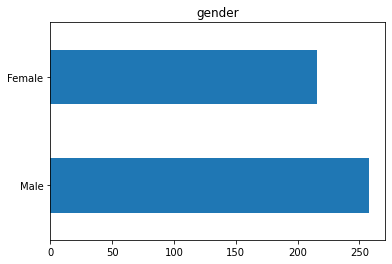

In [16]:
data["gender"].value_counts().plot.barh().set_title("gender");

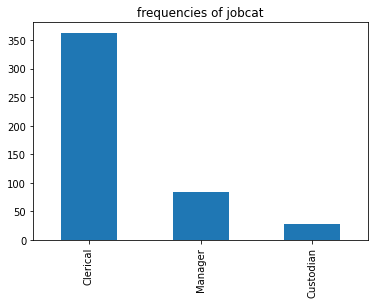

In [17]:
data["jobcat"].value_counts().plot.bar().set_title("frequencies of jobcat");


### Pie Charts

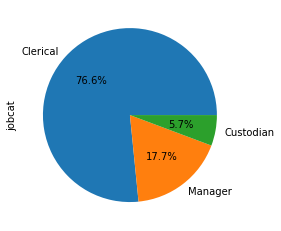

In [18]:
data["jobcat"].value_counts().plot.pie(autopct="%.1f%%");

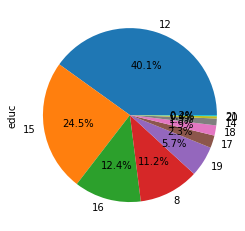

In [19]:
data["educ"].value_counts().plot.pie(autopct="%.1f%%")

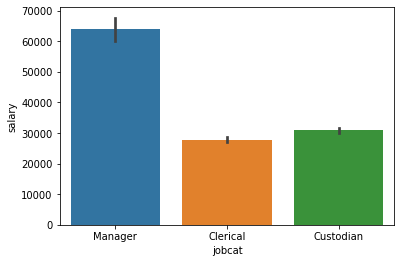

In [20]:
sns.barplot(x = "jobcat", y = "salary", data= data);


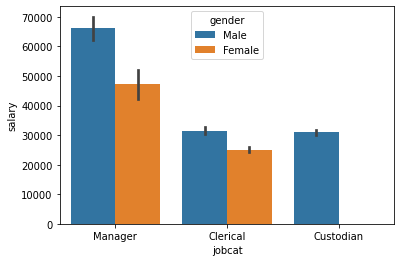

In [21]:
sns.barplot(x = "jobcat", y = "salary", hue = "gender", data = data);

### Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


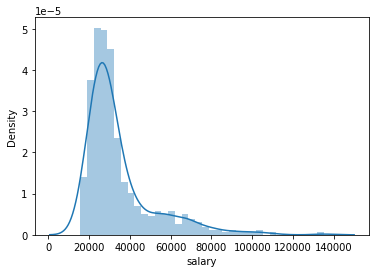

In [22]:
sns.distplot(data.salary, kde = True);

In [23]:
data["logsal"]=np.log(data["salary"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


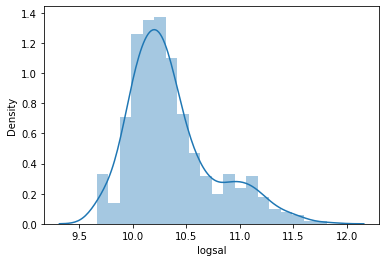

In [24]:
sns.distplot(data.logsal, kde = True);

### Box Plot

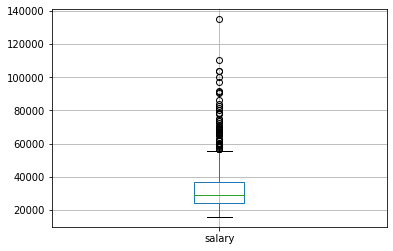

In [25]:
data.boxplot("salary");

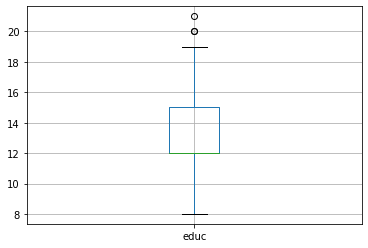

In [26]:
data.boxplot("educ")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


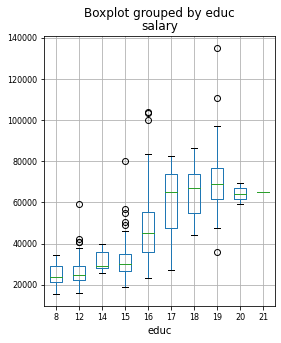

In [27]:
data.boxplot("salary","educ", fontsize=8,
    rot=0,
    grid=True,
    figsize=(4,5)
            );

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


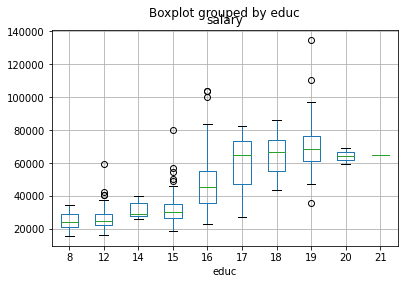

In [28]:
data.boxplot("salary","educ");

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


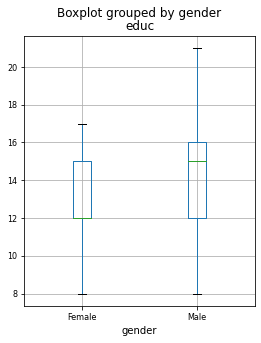

In [29]:
data.boxplot("educ","gender", fontsize=8,
    rot=0,
    grid=True,
    figsize=(4,5)
            );

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f124abec2d0>]],
      dtype=object)

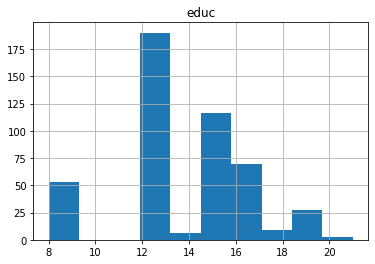

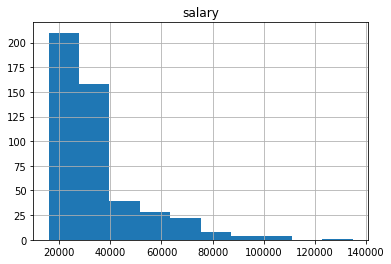

In [30]:
data.hist("educ")
data.hist("salary")

### Scatter Plots

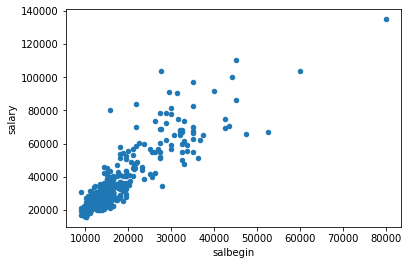

In [31]:
data.plot.scatter(x="salbegin", y="salary")

In [32]:
data[["salbegin","salary","age","educ"]].corr()

,salbegin,salary,age,educ
salbegin,1.000000,0.880117,-0.010870,0.633196
salary,0.880117,1.000000,-0.145870,0.660559
age,-0.010870,-0.145870,1.000000,-0.281349
educ,0.633196,0.660559,-0.281349,1.000000


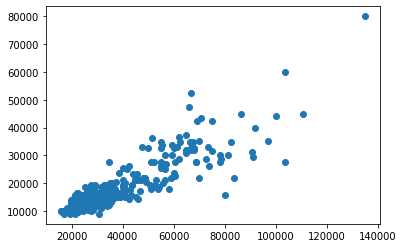

In [33]:
import matplotlib.pyplot as plt
x=data.salary
y=data.salbegin
plt.scatter(x, y);


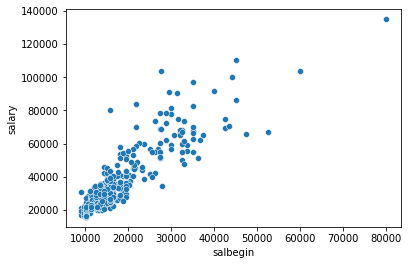

In [34]:
import seaborn as sns
sns.scatterplot(x = "salbegin", y = "salary", data = data);

### Heat maps

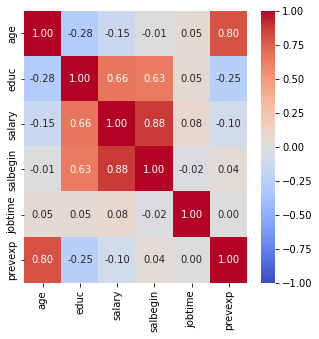

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
ax = sns.heatmap(data.iloc[:,1:8].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt = ".2f")

## Tests for Normality

Almost all parametric statistical methods are based on the assumption that data are drawn from a normal distribution. The hypotheses for the analysis of normality are as follows: \\
$H_0$: Normal probability density function is suitable for the distribution \\
$H_1$: Normal probability density function is not suitable for the distribution.

### 1. QQ Plot for Normality

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


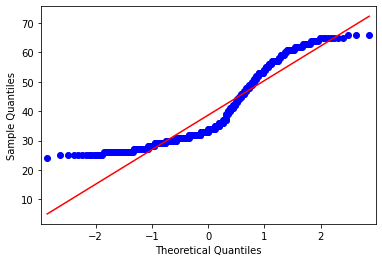

In [36]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot                
from matplotlib import pyplot
fig = sm.qqplot(data["age"],line='s')

pyplot.show()

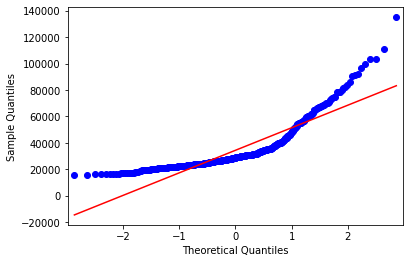

In [37]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
fig = sm.qqplot(data["salary"],line='s')

pyplot.show()

In [38]:
data["salary"].skew()

2.1246062823682506

In [39]:
data["salary"].kurtosis()

5.37782239613678

### 2. Shapiro and Kolmogorov-Smirnov Tests for Normality

**Kolmogorov-Smirnov Test:** The test is based on comparison of the cumulative frequency distribution obtained from the sample with the theoretical cumulative distribution. \\
**Skewness and Kurtosis Tests:** The skewness and kurtosis measures based on the moments give information about the distribution of the data. \\
**Shapiro-Wilk Test:** It is based on the calculation of the W statistic to test whether a random sample is
drawn from a normally distributed population.

In [40]:
from scipy.stats import shapiro, normaltest               

In [41]:
stat, p = shapiro(data["salary"])
print(stat, p)

0.7706089019775391 3.2921073632187326e-25


In [42]:
stat, p = normaltest(data["salary"])
print(stat,p)

219.36093410932722 2.3247613975202802e-48


In [43]:
data = data[data.salary <= 55000]

### Log transformed salary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


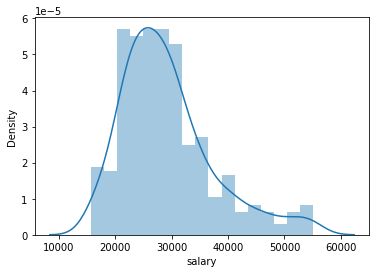

In [44]:
sns.distplot(data.salary, kde = True);

In [45]:
data["logsal"]=np.log(data["salary"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


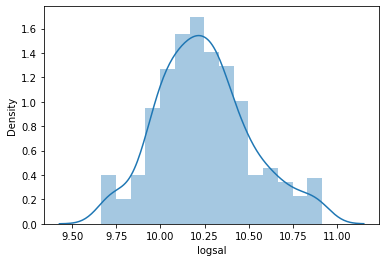

In [46]:
sns.distplot(data.logsal, kde = True);

## Statistical Inference: Estimation

### Confidence Intervals of Means and Proportions

There are two types of parameter estimates;
1. Point estimation: A single numerical value of a statistic that best estimates the
parameter is called point estimation. Sample mean, for example, is a point estimator
of the population mean.
2. Interval estimation: Its goal is to find the lower and upper boundaries within
which the unknown population parameter can be identified with a high degree of
certainty.

In [47]:
#confidence interval
import statsmodels.stats.api as sms
sms.DescrStatsW(data ["educ"]).tconfint_mean()                                   

(12.677801159326572, 13.163925459378463)

In [48]:
sms.DescrStatsW(data ["salary"]).tconfint_mean()  

(28375.15106788297, 29953.0263901506)

Confidence interval statistics for salary, education and previous experience variables:

In [49]:
!pip install researchpy
import researchpy as rp
rp.summary_cont(data[["salary","educ","prevexp"]])                                         


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,salary,417.0,29164.0887,8195.9114,401.3555,28375.1511,29953.0264
1,educ,417.0,12.9209,2.5251,0.1237,12.6778,13.1639
2,prevexp,417.0,98.9568,108.0163,5.2896,88.5592,109.3545


### Tests of Hypothesis

A statistical hypothesis is a statement made concerning one or more unknown
population parameters and denoted by H0. Every hypothesis has a contradiction or
alternative, denoted by H1. \\
$H_0:$ 𝜇 = 100 (Null hypothesis) \\
$H_1:$ 𝜇 ≠ 100 (Alternative hypothesis)

In [50]:
import scipy.stats as stats

print(stats.ttest_1samp(data["salary"],34000))
print(stats.ttest_1samp(data["salary"],32000))
print(stats.ttest_1samp(data["educ"],14))

Ttest_1sampResult(statistic=-12.048947063029209, pvalue=6.941068238597507e-29)
Ttest_1sampResult(statistic=-7.065833689826449, pvalue=6.766271559179124e-12)
Ttest_1sampResult(statistic=-8.727152889251009, pvalue=6.375667489827155e-17)


In [51]:

stats.ttest_1samp(data["educ"], popmean = 13.5)                                          


Ttest_1sampResult(statistic=-4.6835720505647105, pvalue=3.823224347044722e-06)

In [52]:
stats.ttest_1samp(data["educ"], popmean = 13)  

Ttest_1sampResult(statistic=-0.6399912118784103, pvalue=0.5225306237272398)

In [53]:
#one sample test of proportion

from statsmodels.stats.proportion import proportions_ztest                 # woman proportion in this sector   

In [54]:
proportions_ztest(216, 474, 0.6)

(-6.308244881769579, 2.822174450817631e-10)

### Independent Samples t Test

In [55]:
#  (equal variances and different variances)

data_group = data.groupby("gender")["educ"].apply(list)
data_group

gender
Female    [12, 8, 12, 15, 12, 16, 15, 12, 16, 15, 12, 15...
Male      [16, 15, 15, 15, 8, 15, 12, 12, 15, 12, 12, 15...
Name: educ, dtype: object

In [56]:
#equal variances
print(stats.levene(data_group["Female"],data_group["Male"]))

#different variances
print(stats.ttest_ind(data_group["Female"],data_group["Male"], equal_var=False))

LeveneResult(statistic=7.261680271213743, pvalue=0.007330184191647675)
Ttest_indResult(statistic=-5.105972888205966, pvalue=5.083071826010621e-07)


In [57]:
data_group2 = data.groupby("jobcat")["salary"].apply(list)
data_group2

jobcat
Clerical     [40200, 21450, 21900, 45000, 32100, 36000, 219...
Custodian    [30750, 30750, 30750, 30000, 30750, 30750, 243...
Manager      [48000, 55000, 53125, 46000, 45250, 54875, 378...
Name: salary, dtype: object

In [58]:
print(stats.levene(data_group2["Clerical"],data_group2["Custodian"]))
print(stats.ttest_ind(data_group2["Clerical"],data_group2["Custodian"], equal_var=False))


LeveneResult(statistic=19.593182792423782, pvalue=1.2486094015857569e-05)
Ttest_indResult(statistic=-6.201635214961916, pvalue=2.512556389409102e-08)


In [59]:
data["manag"]=np.where(data["jobcat"].str.contains("Manager"),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,logsal,manag
1,Male,37,16,Clerical,40200,18750,98,36,10.601622,0
2,Female,66,12,Clerical,21450,12000,98,381,9.973480,0
3,Female,48,8,Clerical,21900,13200,98,190,9.994242,0
4,Male,40,15,Clerical,45000,21000,98,138,10.714418,0
5,Male,37,15,Clerical,32100,13500,98,67,10.376611,0


In [61]:
data_groupManager = data.groupby("gender")["manag"].apply(list)
data_groupManager

gender
Female    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Male      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: manag, dtype: object

In [62]:
sms.DescrStatsW(data ["manag"]).tconfint_mean()  

(0.0450285909007323, 0.09406013811605426)


### ANOVA (Analysis of Variance)

The hypothesis of whether there is a difference between more than two means is
tested using analysis of variance (ANOVA). \\
The hypothesis test of analysis of variance: \\
$H_0: 𝜇_1 = 𝜇_2 = 𝜇_3 = 𝜇_4 = ... 𝜇_r$ \\
$H_1:$ null hypothesis is wrong (at least one of them is different)

In [63]:
# testing more than 2 groups
# Anova
data_group3 = data.groupby("jobcat")["educ"].apply(list)
data_group3

jobcat
Clerical     [16, 12, 8, 15, 15, 15, 12, 15, 12, 16, 8, 15,...
Custodian    [12, 12, 8, 8, 12, 12, 15, 12, 8, 8, 8, 12, 8,...
Manager      [16, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...
Name: educ, dtype: object

In [64]:
stats.f_oneway(data_group3["Clerical"],data_group3["Custodian"],data_group3["Manager"])

F_onewayResult(statistic=54.260351189747645, pvalue=1.1793581316933225e-21)

### Pairwise Tukey analysis

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [66]:
tukey = pairwise_tukeyhsd(endog=data['educ'],
                          groups=data['jobcat'],
                          alpha=0.05)

In [67]:
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
 Clerical Custodian  -2.6625 0.001 -3.7198 -1.6051   True
 Clerical   Manager   3.5317 0.001  2.5088  4.5546   True
Custodian   Manager   6.1941 0.001  4.7768  7.6114   True
---------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


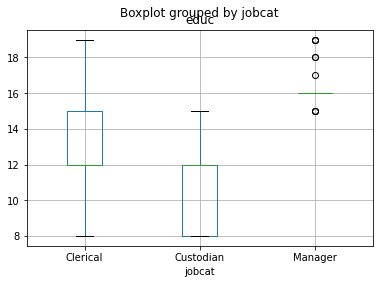

In [68]:
data.boxplot("educ", by = "jobcat")

In [69]:
import scipy.stats as stats
stats.describe(data.salary)

DescribeResult(nobs=417, minmax=(15750, 55000), mean=29164.088729016785, variance=67172963.71085824, skewness=1.09552646311231, kurtosis=1.1264260949785392)

In [70]:
data["cler"]=np.where(data["jobcat"].str.contains("Clerical"),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
data["male"]=np.where(data["gender"].str.contains("Male"),1,0)               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
#  dummies = pd.get_dummies(data[['gender', 'jobcat']])   can be used to get all dummies 

In [73]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,logsal,manag,cler,male
1,Male,37,16,Clerical,40200,18750,98,36,10.601622,0,1,1
2,Female,66,12,Clerical,21450,12000,98,381,9.973480,0,1,0
3,Female,48,8,Clerical,21900,13200,98,190,9.994242,0,1,0
4,Male,40,15,Clerical,45000,21000,98,138,10.714418,0,1,1
5,Male,37,15,Clerical,32100,13500,98,67,10.376611,0,1,1


In [74]:
data["genxedu"]=data["educ"]*data["male"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,logsal,manag,cler,male,genxedu
1,Male,37,16,Clerical,40200,18750,98,36,10.601622,0,1,1,16
2,Female,66,12,Clerical,21450,12000,98,381,9.973480,0,1,0,0
3,Female,48,8,Clerical,21900,13200,98,190,9.994242,0,1,0,0
4,Male,40,15,Clerical,45000,21000,98,138,10.714418,0,1,1,15
5,Male,37,15,Clerical,32100,13500,98,67,10.376611,0,1,1,15


In [76]:
data["manag"].describe()

count    417.000000
mean       0.069544
std        0.254683
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: manag, dtype: float64

In [77]:
data["manag"].value_counts()

0    388
1     29
Name: manag, dtype: int64

In [78]:
#estimated managers proportion
sms.DescrStatsW(data ["manag"]).tconfint_mean()  

(0.0450285909007323, 0.09406013811605426)

## Bayesian Statistics

Bayesian statistical analysis integrates a prior probability distribution and
likelihoods of observed data to calculate a posterior probability distribution of occurrences based on Bayes’ theorem.

In [79]:
# bayesian statistics
# We pick the managers rate of 25%.
manager = 0.25


In [80]:
import scipy.stats as stats
import matplotlib.pyplot as plt
a = 84
b = 474 - a
# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

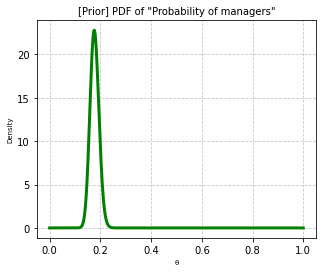

In [81]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='green')
# Add a title
plt.title('[Prior] PDF of "Probability of managers"', fontsize=10)
# Add X and y Label
plt.xlabel('θ', fontsize=7)
plt.ylabel('Density', fontsize=7)
# Add a grid
plt.grid(alpha=.7, linestyle='--')
# Show the plot
plt.show()

In [82]:
len(data.manag)

417

In [83]:
# The sampling dist P(X|θ) with a prior θ
likelihood = stats.binom.pmf(k = np.sum(data.manag), n = len(data.manag), p = a/(a+b))

### Likelihood

In [84]:
likelihood

8.753679062028519e-11

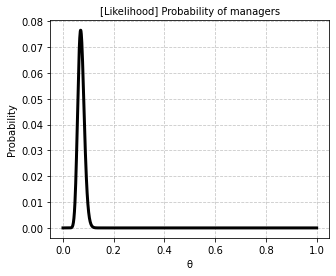

In [85]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(data.manag), n = len(data.manag), p = theta_range)
# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='black')
# Add a title
plt.title('[Likelihood] Probability of managers' , fontsize=10)
# Add X and y Label
plt.xlabel("θ", fontsize=10)
plt.ylabel("Probability", fontsize=10)
# Add a grid
plt.grid(alpha=.7, linestyle='--')
# Show the plot
plt.show()

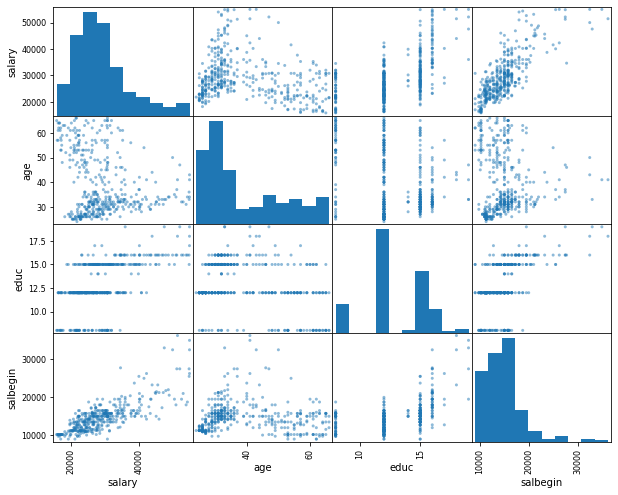

In [86]:
from pandas import plotting
plotting.scatter_matrix(data[['salary', 'age',  "educ", "salbegin"]], figsize=(10,8));

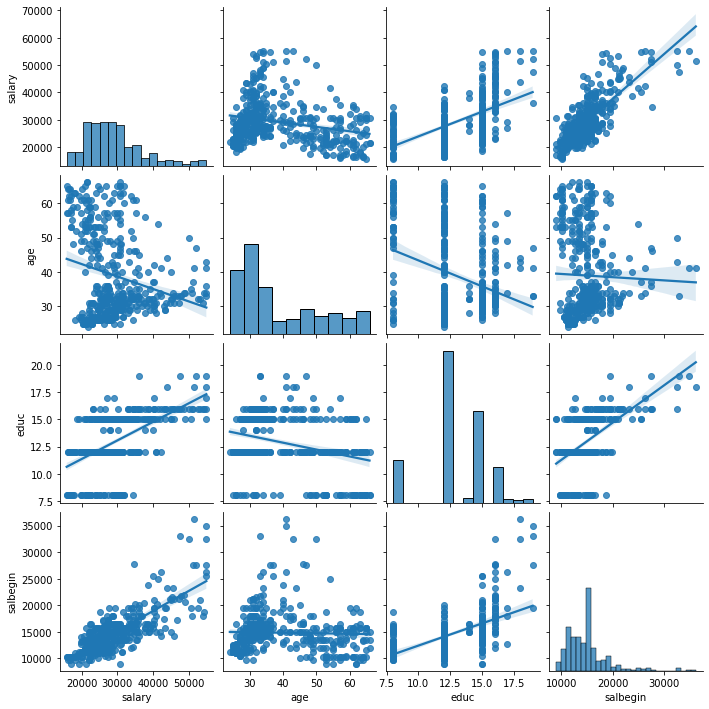

In [87]:
import seaborn
seaborn.pairplot(data, vars=['salary', 'age', 'educ', "salbegin"],
                 kind='reg')

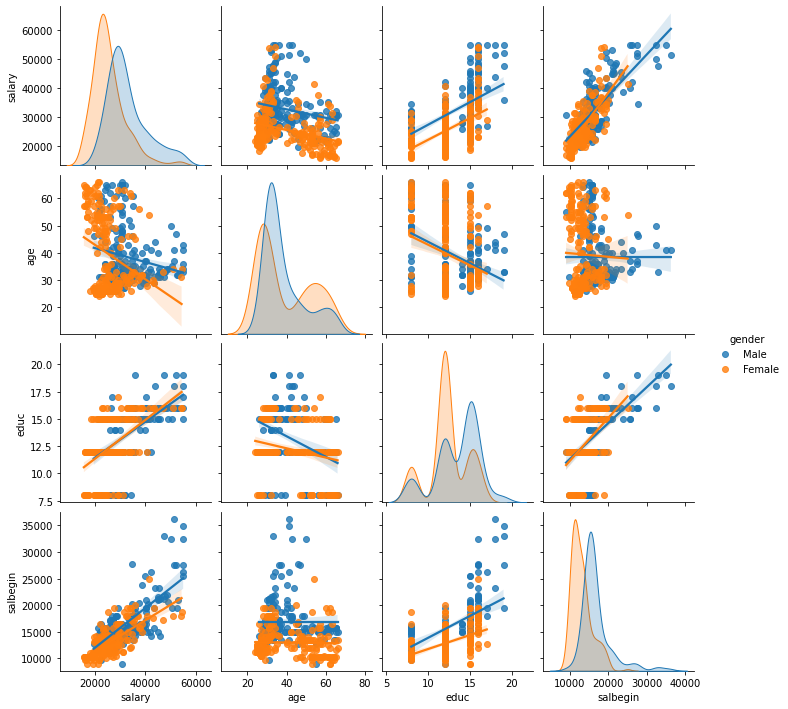

In [88]:
import seaborn
seaborn.pairplot(data, vars=['salary', 'age', 'educ', "salbegin"],
                 kind='reg', hue="gender")

In [89]:
y=data["salary"]

In [90]:
data["eduxjbtm"]=data["educ"]*data["jobtime"]

### Ordinary Least Squares regression (OLS) 

In [91]:
import statsmodels.api as sm
X = data[["educ","jobtime","male","manag","cler","eduxjbtm"]]

In [92]:
X = sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     100.8
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.57e-77
Time:                        07:54:26   Log-Likelihood:                -4160.0
No. Observations:                 417   AIC:                             8334.
Df Residuals:                     410   BIC:                             8362.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.606e+04   1.11e+04      2.352      0.019    4279.015    4.78e+04
educ        -161.0196    834.455     -0.193      0.847   -1801.363    1479.324
jobtime     -140.2314    137.121     -1.023      0.307    -409.779     129.316
male        4273.9763    572.584      7.464      0.000    3148.410    5399.543
manag       1.021e+04   1616.805      6.314      0.000    7029.810    1.34e+04
cler       -3954.3416   1170.681     -3.378      0.001   -6255.628   -1653.055
eduxjbtm      16.3775     10.246      1.598      0.111      -3.763      36.518
==============================================================================
Omnibus:                       60.188   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.297
Skew:                           0.873   Prob(JB):                     1.66e-22
Kurtosis:                       4.651   Cond. No.                     4.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Correlation Table

In [93]:
data.corr()

,age,educ,salary,salbegin,jobtime,prevexp,logsal,manag,cler,male,genxedu,eduxjbtm
age,1.000000,-0.308680,-0.240252,-0.029863,0.027261,0.796925,-0.281687,-0.065994,-0.176998,-0.041281,-0.100162,-0.228812
educ,-0.308680,1.000000,0.554177,0.535272,0.051180,-0.260027,0.551549,0.374899,-0.073710,0.243749,0.422325,0.843547
salary,-0.240252,0.554177,1.000000,0.783408,0.121858,-0.108415,0.984394,0.600917,-0.489484,0.445195,0.520149,0.518480
salbegin,-0.029863,0.535272,0.783408,1.000000,-0.068815,0.090226,0.760284,0.658715,-0.503786,0.484672,0.566934,0.397101
jobtime,0.027261,0.051180,0.121858,-0.068815,1.000000,-0.011879,0.126247,-0.007923,-0.003133,0.056092,0.042422,0.569810
prevexp,0.796925,-0.260027,-0.108415,0.090226,-0.011879,1.000000,-0.114536,-0.041134,-0.319852,0.199554,0.109036,-0.215668
logsal,-0.281687,0.551549,0.984394,0.760284,0.126247,-0.114536,1.000000,0.526998,-0.459873,0.479641,0.541588,0.517347
manag,-0.065994,0.374899,0.600917,0.658715,-0.007923,-0.041134,0.526998,1.000000,-0.694133,0.147344,0.229580,0.299137
cler,-0.176998,-0.073710,-0.489484,-0.503786,-0.003133,-0.319852,-0.459873,-0.694133,1.000000,-0.303965,-0.267594,-0.059458
male,-0.041281,0.243749,0.445195,0.484672,0.056092,0.199554,0.479641,0.147344,-0.303965,1.000000,0.965805,0.220168


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)


    feature          VIF
0     const  1858.914330
1      educ    67.071202
2   jobtime    28.202336
3      male     1.240639
4     manag     2.561548
5      cler     2.412847
6  eduxjbtm    97.444855


In [95]:
data["eduxjbtm"]=data["educ"]*data["jobtime"]

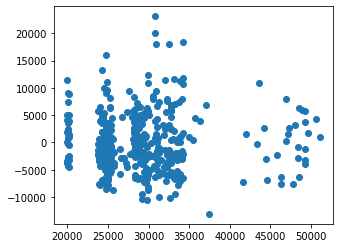

In [96]:
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)


In [97]:
X = data[["educ","manag","cler"]]
y = data["salary"]  
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 12 May 2022   Prob (F-statistic):           2.09e-67
Time:                        07:54:26   Log-Likelihood:                -4191.4
No. Observations:                 417   AIC:                             8391.
Df Residuals:                     413   BIC:                             8407.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.613e+04   1657.202      9.733      0.000    1.29e+04    1.94e+04
educ        1454.0752    122.985     11.823      0.000    1212.321    1695.829
manag       7211.6289   1689.272      4.269      0.000    3890.986    1.05e+04
cler       -7224.3921   1171.549     -6.167      0.000   -9527.334   -4921.450
==============================================================================
Omnibus:                       45.875   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.910
Skew:                           0.762   Prob(JB):                     8.03e-15
Kurtosis:                       4.188   Cond. No.                         96.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
y = data["salary"] 
X = data[["educ","age","jobtime","male","manag","cler","eduxjbtm"]] 

In [99]:
import statsmodels.api as sm
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     94.45
Date:                Thu, 12 May 2022   Prob (F-statistic):           2.10e-81
Time:                        07:54:26   Log-Likelihood:                -4148.4
No. Observations:                 417   AIC:                             8313.
Df Residuals:                     409   BIC:                             8345.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.753e+04    1.1e+04      3.397      0.001    1.58e+04    5.92e+04
educ        -644.9586    818.747     -0.788      0.431   -2254.436     964.519
age         -107.7396     22.296     -4.832      0.000    -151.568     -63.911
jobtime     -193.3839    133.982     -1.443      0.150    -456.763      69.995
male        4125.2830    558.435      7.387      0.000    3027.521    5223.045
manag       9078.0762   1591.730      5.703      0.000    5949.084    1.22e+04
cler       -5369.0790   1177.012     -4.562      0.000   -7682.826   -3055.332
eduxjbtm      20.8283     10.020      2.079      0.038       1.132      40.525
==============================================================================
Omnibus:                       70.025   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.942
Skew:                           0.982   Prob(JB):                     5.47e-27
Kurtosis:                       4.763   Cond. No.                     4.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""